In [1]:
import pandas as pd

mirai = pd.read_csv("../data/blog_eda/mirai.csv")
mirai.shape

(764137, 9)

In [2]:
import datetime

timestamps = pd.to_datetime(mirai["Time"], format="%Y-%m-%d %H:%M:%S.%f")
mirai["Time"] = timestamps
print("Timestamps")
print(timestamps)

Timestamps
0        2018-10-25 01:46:22.933899
1        2018-10-25 01:46:22.933904
2        2018-10-25 01:46:22.934426
3        2018-10-25 01:46:22.934636
4        2018-10-25 01:46:23.291054
                    ...            
764132   2018-10-25 03:45:19.837515
764133   2018-10-25 03:45:19.839396
764134   2018-10-25 03:45:19.840611
764135   2018-10-25 03:45:19.842369
764136   2018-10-25 03:45:19.842464
Name: Time, Length: 764137, dtype: datetime64[ns]


In [3]:
import numpy as np

interarrival_times = np.diff(timestamps) / 1000
interarrival_times

array([   5,  522,  210, ..., 1215, 1758,   95], dtype='timedelta64[ns]')

In [4]:
interarrival_times = np.append(interarrival_times, [0])
mirai["Interarrivals"] = interarrival_times.astype(float)
mirai

,No.,Time,Source,Destination,Protocol,Length,Info,Source Port,Dest Port,Interarrivals
0,1,2018-10-25 01:46:22.933899,192.168.2.108,52.24.43.67,TCP,60,21074 > 80 [SYN] Seq=0 Win=5840 Len=0 MSS=1460,21074.0,80.0,5.0
1,2,2018-10-25 01:46:22.933904,192.168.2.108,52.25.66.250,TCP,60,20532 > 8280 [SYN] Seq=0 Win=5840 Len=0 MSS=...,20532.0,8280.0,522.0
2,3,2018-10-25 01:46:22.934426,192.168.2.1,192.168.2.108,ICMP,86,Destination unreachable (Network unreachable),21074.0,80.0,210.0
3,4,2018-10-25 01:46:22.934636,192.168.2.1,192.168.2.108,ICMP,86,Destination unreachable (Network unreachable),20532.0,8280.0,356418.0
4,5,2018-10-25 01:46:23.291054,48:02:2e:01:83:15,Broadcast,ARP,60,Who has 192.168.2.106? Tell 192.168.2.109,NaN,NaN,76537.0
...,...,...,...,...,...,...,...,...,...,...
764132,764133,2018-10-25 03:45:19.837515,Shenzhen_98:ee:fd,Broadcast,ARP,60,Who has 192.168.2.165? Tell 192.168.2.110,NaN,NaN,1881.0
764133,764134,2018-10-25 03:45:19.839396,Shenzhen_98:ee:fd,Broadcast,ARP,60,Who has 192.168.2.166? Tell 192.168.2.110,NaN,NaN,1215.0
764134,764135,2018-10-25 03:45:19.840611,Shenzhen_98:ee:fd,Broadcast,ARP,60,Who has 192.168.2.167? Tell 192.168.2.110,NaN,NaN,1758.0
764135,764136,2018-10-25 03:45:19.842369,Shenzhen_98:ee:fd,Broadcast,ARP,60,Who has 192.168.2.168? Tell 192.168.2.110,NaN,NaN,95.0


In [5]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

In [6]:
%config InlineBackend.figure_format = 'svg'

array([[<Axes: title={'center': 'Length'}>]], dtype=object)

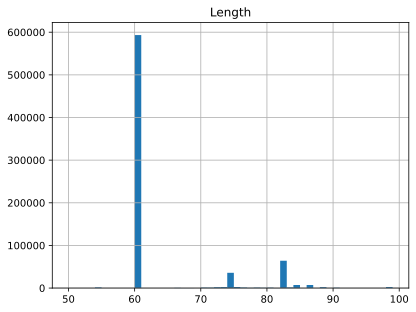

In [7]:
mirai.hist(column="Length", bins=range(50, 100))

array([[<Axes: title={'center': 'Interarrivals'}>]], dtype=object)

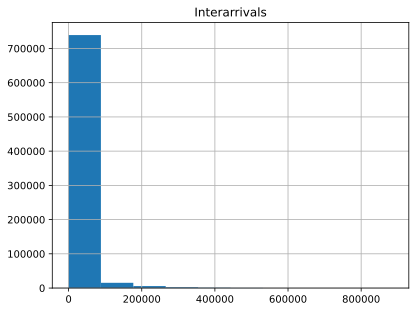

In [8]:
mirai.hist(column="Interarrivals")

<Axes: xlabel='Length', ylabel='Count'>

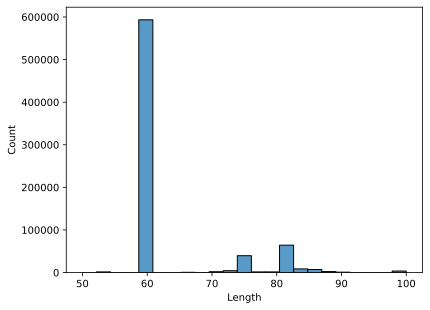

In [9]:
import seaborn as sns

sns.histplot(data=mirai, x="Length", binrange=(50, 100))

<Axes: xlabel='Length', ylabel='Interarrivals'>

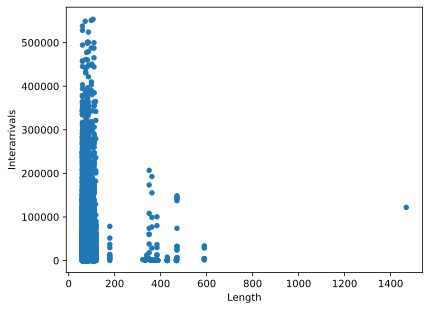

In [10]:
mirai_subset = mirai.head(10000)
mirai_subset.plot.scatter(x="Length", y="Interarrivals")

/tmp/ipykernel_1642384/1336422026.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


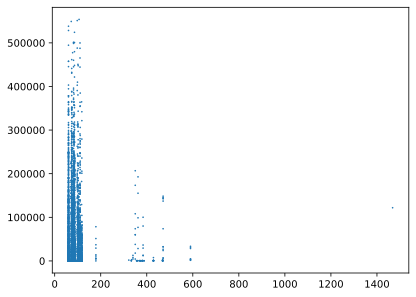

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(
    "Length",
    "Interarrivals",
    "",
    data=mirai_subset,
    linestyle="",
    marker="o",
    markersize=0.7,
)

/tmp/ipykernel_1642384/452966819.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=mirai_subset, x="Length", y="Interarrivals", cmap="Reds", shade=True)


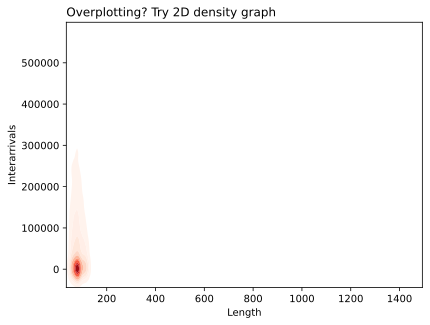

In [12]:
sns.kdeplot(data=mirai_subset, x="Length", y="Interarrivals", cmap="Reds", shade=True)
plt.title("Overplotting? Try 2D density graph", loc="left")
plt.show()

<Axes: xlabel='Length', ylabel='Interarrivals'>

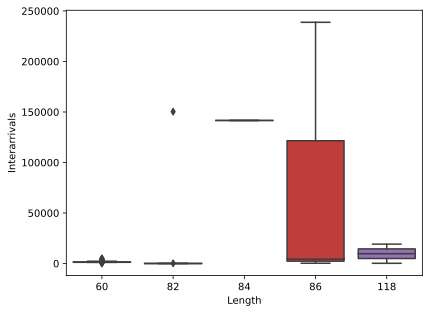

In [13]:
import seaborn as sns

mirai_subset = mirai.sample(n=100, random_state=1)
sns.boxplot(x=mirai_subset["Length"], y=mirai_subset["Interarrivals"])

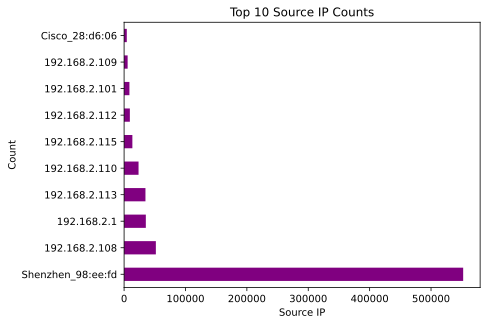

In [14]:
import numpy as np
import matplotlib.pyplot as plt

mirai_source_counts = mirai["Source"].value_counts()
# Get the top 10 source IPs by highest count
top_10_source_ips = mirai_source_counts.nlargest(10)
# Create a bar plot
top_10_source_ips.plot(kind="barh", color="purple")

# Add labels and title
plt.xlabel("Source IP")
plt.ylabel("Count")
plt.title("Top 10 Source IP Counts")

# Show the plot
plt.show()

In [15]:
mirai_subset["Info"].str.cat(sep=" ")

'Who has 192.168.2.123? Tell 192.168.2.110 Who has 192.168.2.74? Tell 192.168.2.110 32761  >  10240 Len=40 Who has 192.168.2.21? Tell 192.168.2.110 Who has 192.168.2.195? Tell 192.168.2.110 Who has 192.168.2.241? Tell 192.168.2.110 Who has 192.168.2.232? Tell 192.168.2.110 Who has 192.168.2.90? Tell 192.168.2.110 Who has 192.168.2.234? Tell 192.168.2.110 Who has 192.168.2.190? Tell 192.168.2.110 Who has 192.168.2.29? Tell 192.168.2.110 Who has 192.168.2.29? Tell 192.168.2.110 Who has 192.168.2.147? Tell 192.168.2.110 Who has 192.168.2.195? Tell 192.168.2.110 32761  >  10240 Len=40 Who has 192.168.2.137? Tell 192.168.2.110 50861  >  10240 Len=40 Who has 192.168.2.151? Tell 192.168.2.110 Who has 192.168.2.166? Tell 192.168.2.110 Who has 192.168.2.15? Tell 192.168.2.110 Who has 192.168.2.210? Tell 192.168.2.110 Who has 192.168.2.148? Tell 192.168.2.110 Who has 192.168.2.165? Tell 192.168.2.110 Who has 192.168.2.60? Tell 192.168.2.110 Who has 192.168.2.204? Tell 192.168.2.110 Who has 192.1

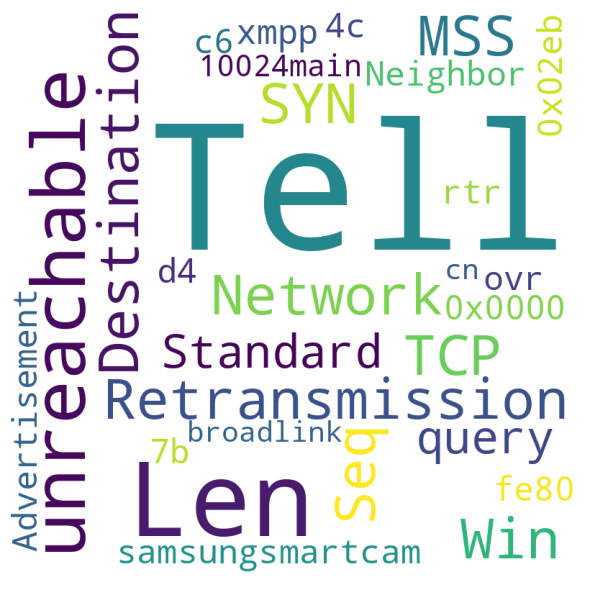

In [16]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text = mirai_subset["Info"].str.cat(sep=" ")

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

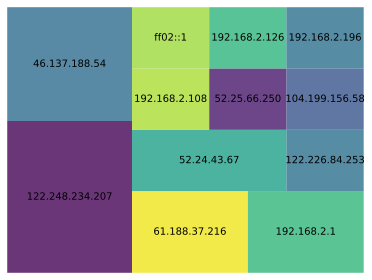

In [17]:
# libraries
import matplotlib.pyplot as plt
import squarify  # pip install squarify (algorithm for treemap)
import pandas as pd

# prep data
# first filter out broadcast destination
mirai_dest = mirai_subset[mirai_subset["Destination"] != "Broadcast"]
# create count and label values
mirai_dest_counts = mirai_dest["Destination"].value_counts()
sizes = mirai_dest_counts.values.tolist()
labels = list(mirai_dest_counts.index.values)

# plot it
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis("off")
plt.show()